學號：0111109069 姓名：李佳毓\
作業題目：regression code + w4 的2個Codes\
繳交期限：2022/10/8 9:30

# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Features

In [6]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## EX1
### Data

In [8]:
x = iris["data"][:, 0].reshape(-1,1)
y = (iris["target"] == 0).astype(np.int) # 轉整數

C:\Users\water\AppData\Local\Temp\ipykernel_10288\2414093338.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 0).astype(np.int) # 轉整數


In [9]:
x[:3]

array([[5.1],
       [4.9],
       [4.7]])

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 配適模型
### 使用LogisticRegression()

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=1, random_state=1) #l2,ridge正則化,用C控制,C越大限制越小
log_reg.fit(x,y)
log_reg.intercept_, log_reg.coef_

(array([18.5455613]), array([[-3.45772499]]))

In [12]:
log_reg.score(x,y)

0.8933333333333333

In [13]:
x_new = [[5],[6.5]]

log_reg.predict(x_new)

array([1, 0])

In [14]:
log_reg.predict_proba(x_new)

array([[0.22150173, 0.77849827],
       [0.98072817, 0.01927183]])

### 使用SGDClassifier()  處理類別的資料

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log', penalty='l2', alpha = 0.0001, random_state = 1)

sgd_clf.fit(x,y)
sgd_clf.intercept_, sgd_clf.coef_

(array([321.68580859]), array([[-61.90239437]]))

In [16]:
sgd_clf.score(x, y)

0.8733333333333333

In [17]:
x_new = [[5],[6.5]]
sgd_clf.predict(x_new)

array([1, 0])

In [18]:
sgd_clf.predict_proba(x_new)

array([[5.16377895e-06, 9.99994836e-01],
       [1.00000000e+00, 9.14592585e-36]])

### Decision Boundary

In [19]:
# h=0, i.e. 0=b+w1x1 => x1=-b/w1
decision_boundary = -log_reg.intercept_ / log_reg.coef_
decision_boundary

array([[5.36351542]])

### Plot of the decision boundary

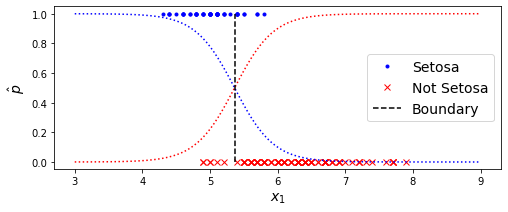

In [20]:
import matplotlib.pyplot as plt 

xs = np.linspace(3, 9, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(xs)

plt.figure(figsize=(8, 3))
plt.plot(x[y==1], y[y==1], "b.", label="Setosa")
plt.plot(x[y==0], y[y==0], "rx", label="Not Setosa")

plt.plot(xs, y_proba[:, 0], "r:")
plt.plot(xs, y_proba[:, 1], "b:")

plt.plot([decision_boundary[0], decision_boundary[0]], [0, 1], "k--", \
         label='Boundary')

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$\hat p$", fontsize=14)
plt.legend(loc="center right", fontsize=14)

plt.show()

## Ex2
### Data

In [21]:
x = iris["data"][:, :2]
y = (iris["target"] == 0).astype(np.int) 

C:\Users\water\AppData\Local\Temp\ipykernel_10288\1073149446.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 0).astype(np.int)


In [22]:
x[:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 配適模型
### 使用 LogisticRegression()

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=1, random_state=42)
log_reg.fit(x, y)
log_reg.intercept_, log_reg.coef_

(array([8.32330389]), array([[-3.38829757,  3.1645277 ]]))

In [25]:
log_reg.score(x, y)

1.0

In [26]:
x_new = [[5.5, 2.8],[4.5, 3.25]]
log_reg.predict(x_new)

array([0, 1])

In [27]:
log_reg.predict_proba(x_new)

array([[0.81025304, 0.18974696],
       [0.03354717, 0.96645283]])

### Decision Boundary

In [28]:
# b+w1x1+w2x2=0 => (x1, x2), where x2=-(b+w1x1)/w2

x1_boundary = np.linspace(x.min(axis=0)[0]-0.05, x.max(axis=0)[0]+0.05, 5)
x2_boundary = - (log_reg.intercept_[0] + log_reg.coef_[0][0] * x1_boundary) / log_reg.coef_[0][1]
boundary = np.c_[x1_boundary, x2_boundary]
boundary

array([[4.25      , 1.92033737],
       [5.175     , 2.9107459 ],
       [6.1       , 3.90115444],
       [7.025     , 4.89156298],
       [7.95      , 5.88197152]])

### Plot of the decision boundary

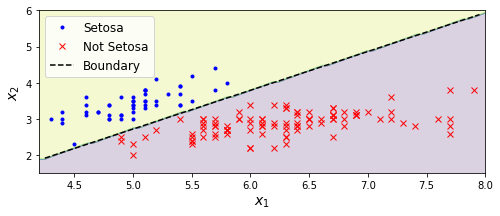

In [29]:
x1s = np.linspace(4.2, 8, 100).reshape(-1, 1)
x2s = np.linspace(1.5, 6, 100).reshape(-1, 1)

x1, x2 = np.meshgrid(x1s, x2s)
x_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = log_reg.predict(x_new)

plt.figure(figsize=(8, 3))
plt.plot(x[y==1, 0], x[y==1,1], "b.", label="Setosa")
plt.plot(x[y==0, 0], x[y==0,1], "rx", label="Not Setosa")

zz = y_pred.reshape(x1.shape)
plt.contourf(x1, x2, zz, alpha=0.2)
plt.plot(boundary[:, 0], boundary[:, 1], "k--", label='Boundary')

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

plt.show()